# Download Sample Dataset

In this notebook, we will provide a simple way for you to download a resonably sized demo training set to train a donkeycar model. We will also do some light EDA to get a sense of what the data looks like. 

In [1]:
import tarfile
import wget
import shutil
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = 'https://github.com/autorope/donkey_datasets/raw/master/circuit_launch_20210716/circuit_launch_20210716_1611.tar.gz'
fname = 'circuit_launch_20210716_1611.tar.gz'
downloaded_dir = "murmurpi4_circuit_launch_20210716_1611/"

if not os.path.exists("./data/images/"):
    print("Downloading dataset")
    data = wget.download(url)
    print("Extracing files to data directory")
    with tarfile.open(fname) as f:
        f.extractall()
    print("Cleaning up temporary files")
    shutil.copytree(downloaded_dir + "/data", "data", dirs_exist_ok=True)
    shutil.rmtree(downloaded_dir)
    os.remove(fname)
    print("Data now available in 'data/' directory") 
else:
    print("Data already present in data directory") 

Extracing files to data directory
Cleaning up temporary files
Data now available in 'data/` directory


## What did we just download?

This is a subset of the Circuit Launch Dataset provided by the donkeycar project. Take a look at their [repo](https://github.com/autorope/donkey_datasets/tree/master/circuit_launch_20210716) for more deatils.

This dataset contains a set of catalog and manifest files that provide the labels and metadata for each image. There is also a seperate `images` directory where all the images are stored.  

**image directory**: This folder contains all the images named from 1 to N with the format `N_cam_image_array_.jpg`.

**catalog_manifest**: These files contain the lengths of each line of json in the catolog files. 

**catalog**: These files contain metadata about each image and serve as the labels for our model trainig. For each image, there is an associated: * 

* *session_id*
* *timestamp* 
* *image file name* 
* *angle*
* *user/mode* 
* *throttle value* 

Please see the output below for an example of these features.  

In [3]:
d = pd.read_json("data/catalog_0.catalog", lines=True)
d.head(3).set_index("_index")

,_session_id,_timestamp_ms,cam/image_array,user/angle,user/mode,user/throttle
_index,,,,,,
0,21-07-17_0,1626558942588,0_cam_image_array_.jpg,0.0,user,0.170782
1,21-07-17_0,1626558942591,1_cam_image_array_.jpg,0.0,user,0.202399
2,21-07-17_0,1626558942642,2_cam_image_array_.jpg,0.0,user,0.202399


## Example input data for model training

Let's take a look at a quick look at an input/output pair for training a self-driving car.  

   user/angle  user/throttle
0         0.0       0.170782


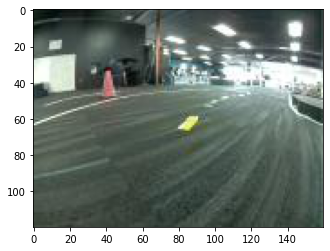

In [4]:
img = mpimg.imread("data/images/0_cam_image_array_.jpg")
plt.imshow(img)
print(d.head(1)[["user/angle","user/throttle"]])

Congrats! Now that you have a dataset, an understanding of the data, its format and what the donkey car tools expect for trainig, let's move to the next notebook and train a model!  